<h1>Regresión Lógistica</h1>

<p>Datos sobre los pasajeros del Titanic para predecir quién sobrevivió al naufragio</p>

<h3>Paso 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.</h3>

In [1]:
#Importar las librerias necesarias para la actividad

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import LabelEncoder

In [2]:
# Cargar dataset
Datos = pd.read_csv('Titanic-Dataset.csv')

In [3]:
# Visualizar los Datos para el análisis exploratorio
Datos.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
#Información general de los datos
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#Identificación de valores duplicados
Datos.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [6]:
Datos.duplicated().sum()

0

<h3>Paso 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.</h3>

In [7]:
#Modificar los titulo de las columnas
Datos.rename(columns={'PassengerId':'ID Pasajero','Survived':'Sobrevivió','Pclass':'Clase','Name':'Nombre','Sex':'Género','Age':'Edad','SibSp':'NumHermanosConyuges','Parch':'NumPadresHijos','Ticket':'Boleto','Fare':'Tarifa','Cabin':'Cabina','Embarked':'Embarque'}, inplace=True)

In [8]:
#Identificar datos faltantes
Datos.isnull().sum()

ID Pasajero              0
Sobrevivió               0
Clase                    0
Nombre                   0
Género                   0
Edad                   177
NumHermanosConyuges      0
NumPadresHijos           0
Boleto                   0
Tarifa                   0
Cabina                 687
Embarque                 2
dtype: int64

In [9]:
#Tratamiento datos faltantes Edad

Datos['Edad'] = Datos['Edad'].round()

Datos['Edad'].fillna(Datos['Edad'].mean(), inplace=True)

Datos['Edad'] = Datos['Edad'].round()

In [10]:
#Tratamiento datos faltantes Cabina
Datos.drop('Cabina', axis=1, inplace=True)

In [11]:
#Eliminación de columna
Datos.drop('Nombre', axis=1, inplace=True)
Datos.drop('Boleto', axis=1, inplace=True)
Datos.drop('Embarque', axis=1, inplace=True)

In [12]:
#Transformar género
le = LabelEncoder()
Datos['Género_C'] = le.fit_transform(Datos['Género'])
Datos['Género'] = Datos['Género_C']
Datos.drop(columns=['Género_C'], inplace=True)
Datos.rename(columns={'Género_C':'Género'}, inplace=True)

In [13]:
#Identificar datos faltantes
Datos.isnull().sum()

ID Pasajero            0
Sobrevivió             0
Clase                  0
Género                 0
Edad                   0
NumHermanosConyuges    0
NumPadresHijos         0
Tarifa                 0
dtype: int64

In [14]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID Pasajero          891 non-null    int64  
 1   Sobrevivió           891 non-null    int64  
 2   Clase                891 non-null    int64  
 3   Género               891 non-null    int32  
 4   Edad                 891 non-null    float64
 5   NumHermanosConyuges  891 non-null    int64  
 6   NumPadresHijos       891 non-null    int64  
 7   Tarifa               891 non-null    float64
dtypes: float64(2), int32(1), int64(5)
memory usage: 52.3 KB


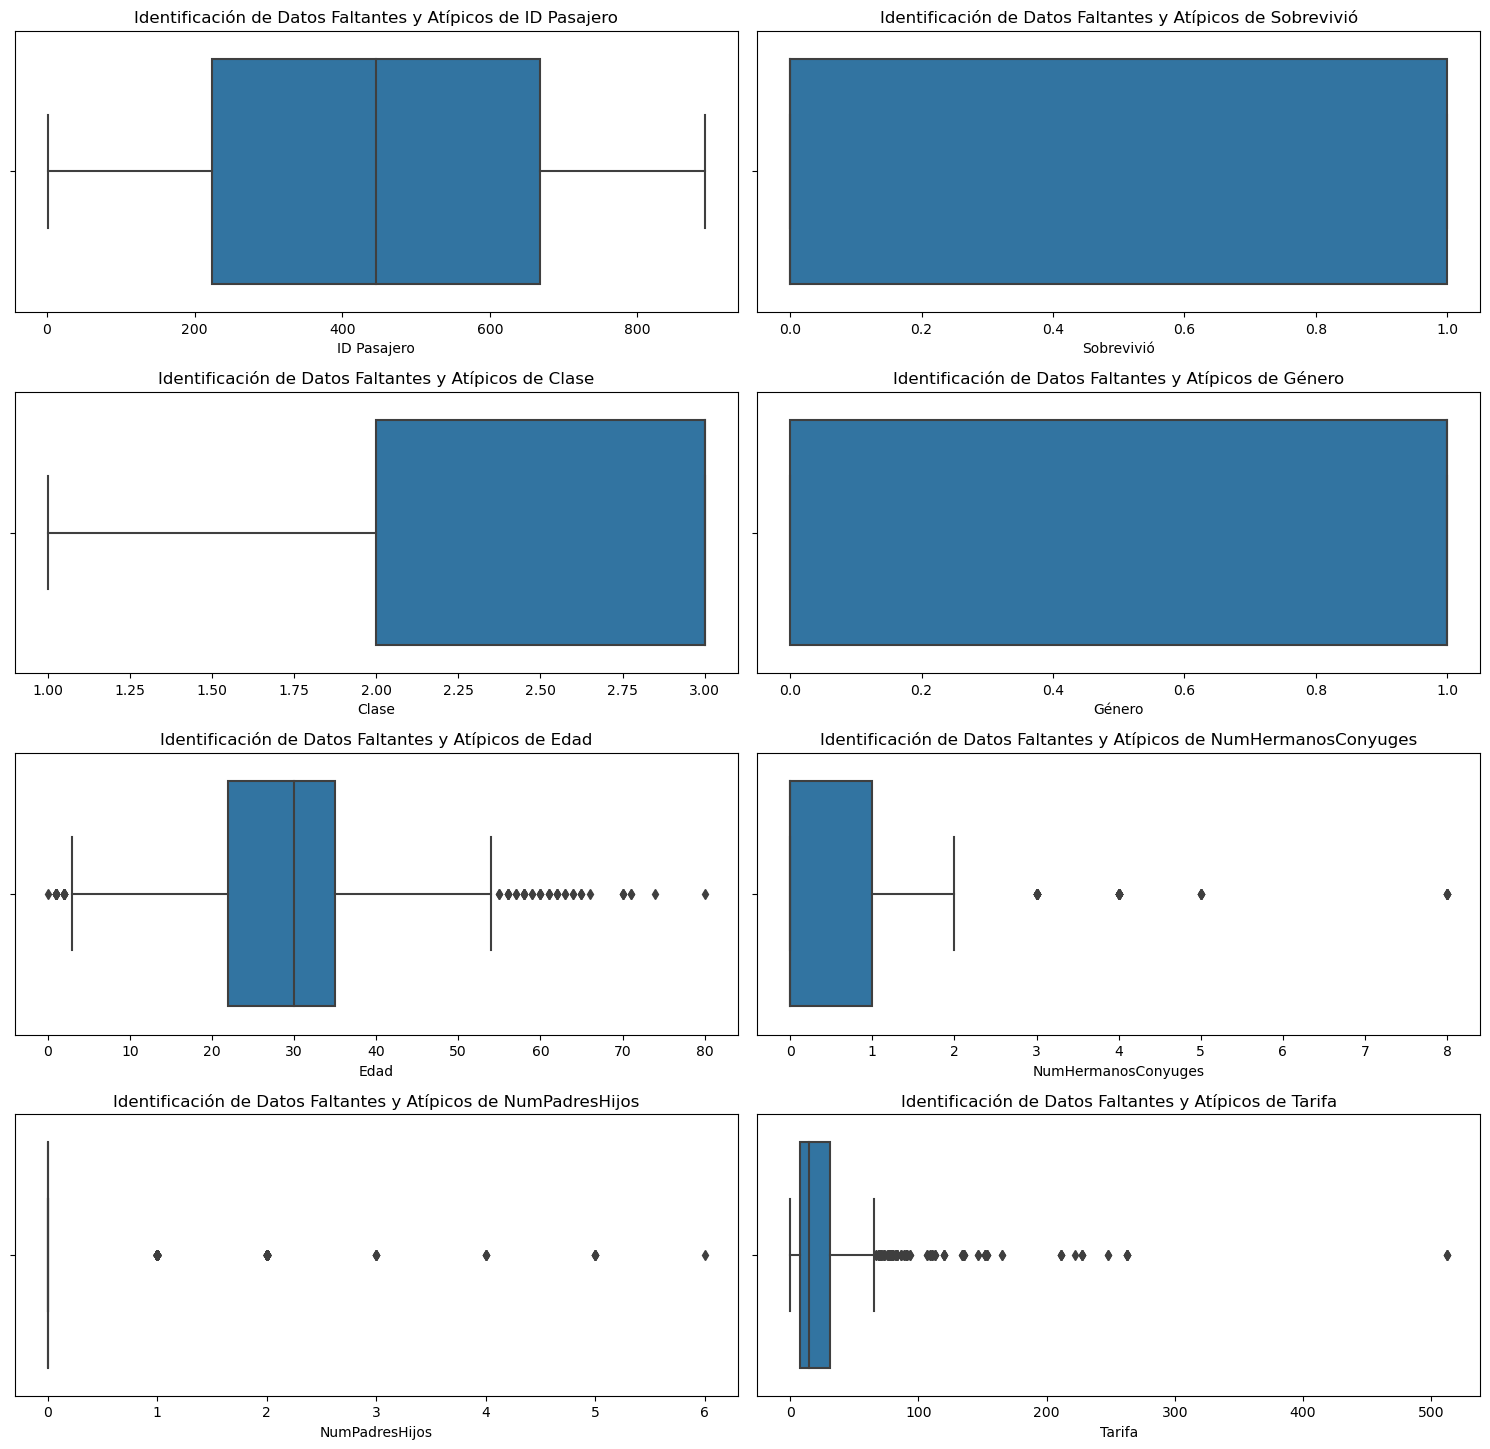

In [15]:
#Identificar Valores Atípicos

plt.figure(figsize=(15, 25))
for i, column in enumerate(Datos.columns):
    plt.subplot(7, 2, i + 1)
    sns.boxplot(x=Datos[column])
    plt.title('Identificación de Datos Faltantes y Atípicos de ' + column)
plt.tight_layout()
plt.show()

In [16]:
#Conteo y eliminación de Datos Atípicos Tarifa

num_maximo=400
Total_Atipicos_Tarifa =((Datos['Tarifa']>num_maximo)).sum()
print("El total de datos atípicos de Tarifa es {}".format(Total_Atipicos_Tarifa))


El total de datos atípicos de Tarifa es 3


In [17]:
#Filtrar Datos

Datos=Datos[(Datos['Tarifa']<num_maximo)]

In [18]:
#Validación de eliminación de datos atipicos en Presión Arterial

Total_Atipicos_Tarifa =((Datos['Tarifa']>num_maximo)).sum()
print("El total de datos atípicos de Tarifa es {}".format(Total_Atipicos_Tarifa))

El total de datos atípicos de Tarifa es 0


In [19]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 890
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID Pasajero          888 non-null    int64  
 1   Sobrevivió           888 non-null    int64  
 2   Clase                888 non-null    int64  
 3   Género               888 non-null    int32  
 4   Edad                 888 non-null    float64
 5   NumHermanosConyuges  888 non-null    int64  
 6   NumPadresHijos       888 non-null    int64  
 7   Tarifa               888 non-null    float64
dtypes: float64(2), int32(1), int64(5)
memory usage: 59.0 KB


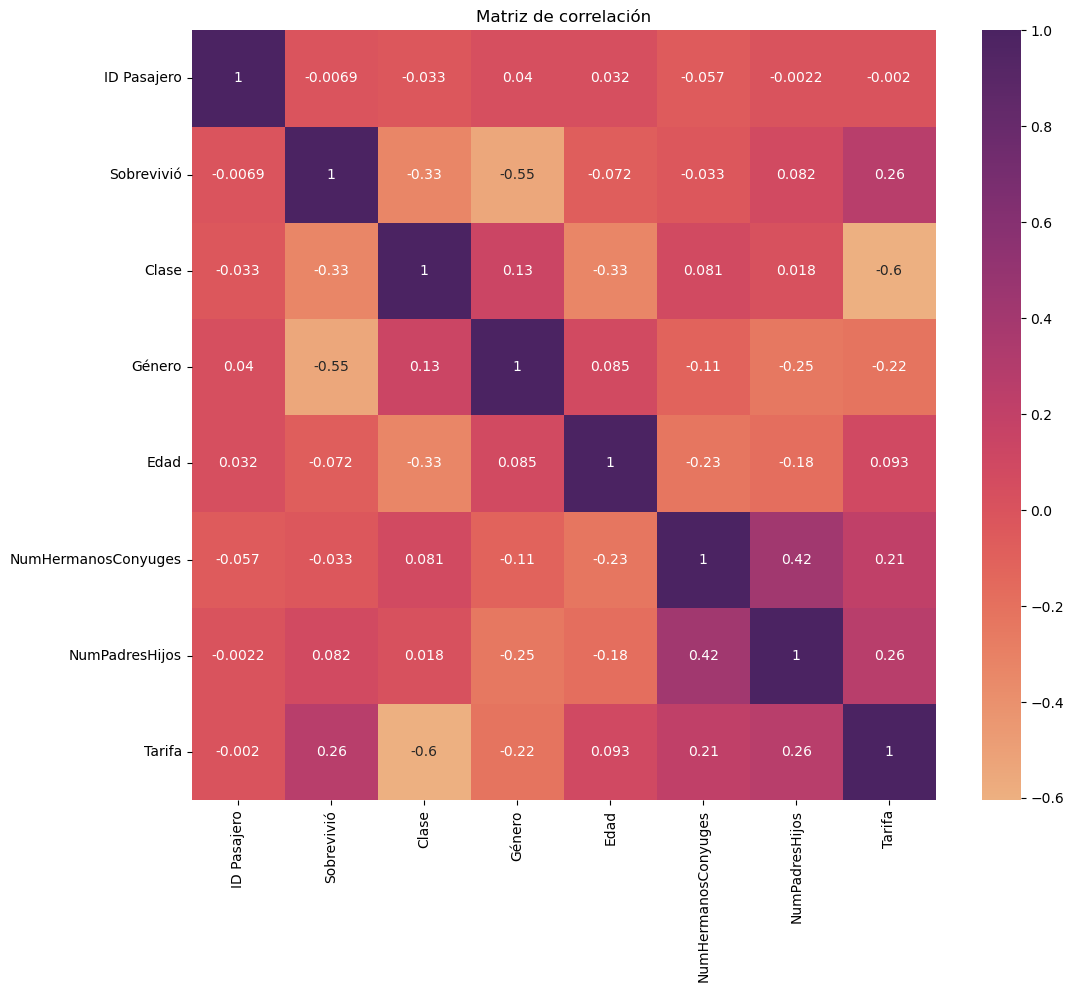

In [20]:
#Matriz de correlación
plt.figure(figsize=(12,10))
sns.heatmap(Datos.corr(), annot=True, cmap='flare')
plt.title('Matriz de correlación')
plt.show()

<h3>Paso 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.</h3>

<p>
    Características de intereses:
    <ul> 
        <li>Sobrevivió: Si un pasajero del Titanic sobrevivió o no. (0 = No sobrevivió y 1 = Si sobrevivió)
        </li>
        <li>Predecir si un pasajero del Titacnic sobrevivió o no al naufragio.
        </li>
    </ul>
</p>

In [21]:
# Total de personas Sobrevivientes

Datos['Sobrevivió'].value_counts()

0    549
1    339
Name: Sobrevivió, dtype: int64

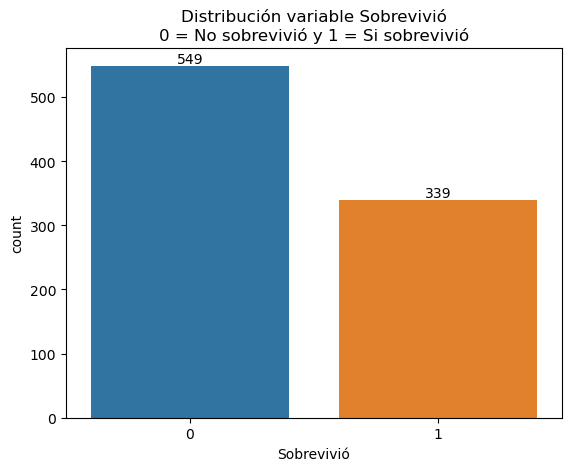

In [22]:
# Distribución gráfica para la variable condicion

sns.countplot(x='Sobrevivió', data=Datos)
plt.title('Distribución variable Sobrevivió\n0 = No sobrevivió y 1 = Si sobrevivió')

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.show()

<h3>Paso 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.</h3>

In [23]:
#Porcentaje de datos para entrenamiento (train) = 75% y para pruebe (test) = 25%

#Declarar variables

X = Datos.drop('Sobrevivió', axis=1)
Y = Datos['Sobrevivió']

#División del conjunto de datos
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, stratify = Y, random_state = 0)

In [24]:
print (X_train)

     ID Pasajero  Clase  Género  Edad  NumHermanosConyuges  NumPadresHijos  \
671          672      1       1  31.0                    1               0   
488          489      3       1  30.0                    0               0   
634          635      3       0   9.0                    3               2   
21            22      2       1  34.0                    0               0   
418          419      2       1  30.0                    0               0   
..           ...    ...     ...   ...                  ...             ...   
131          132      3       1  20.0                    0               0   
490          491      3       1  30.0                    1               0   
528          529      3       1  39.0                    0               0   
48            49      3       1  30.0                    2               0   
80            81      3       1  22.0                    0               0   

      Tarifa  
671  52.0000  
488   8.0500  
634  27.9000  
21 

In [25]:
print (Y_train)

671    0
488    0
634    0
21     1
418    0
      ..
131    0
490    0
528    0
48     0
80     0
Name: Sobrevivió, Length: 666, dtype: int64


<h3>Paso 5. Entrenar el modelo configurando los diferentes hiperparámetros.</h3>

In [26]:
#Construir modelo de regresión logística

Regresion_Titanic = LogisticRegression(solver = "liblinear")
Regresion_Titanic.fit (X_train, Y_train)

#Crear modelo de predicción

Prediccion = Regresion_Titanic.predict(X_test)

In [27]:
print (Y_test)

654    0
319    1
182    0
684    0
600    1
      ..
882    0
434    0
304    0
500    0
633    0
Name: Sobrevivió, Length: 222, dtype: int64


In [28]:
print (Prediccion)

[1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0
 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0
 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]


<h3>Paso 6. Evaluar el desempeño del modelo en conjunto de Test con métricas como precisión, recall, F1 – score, etc.</h3>

In [29]:
#Evaluar desempeño

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       137
           1       0.78      0.66      0.71        85

    accuracy                           0.80       222
   macro avg       0.79      0.77      0.78       222
weighted avg       0.80      0.80      0.79       222



<h3>Paso 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.</h3>

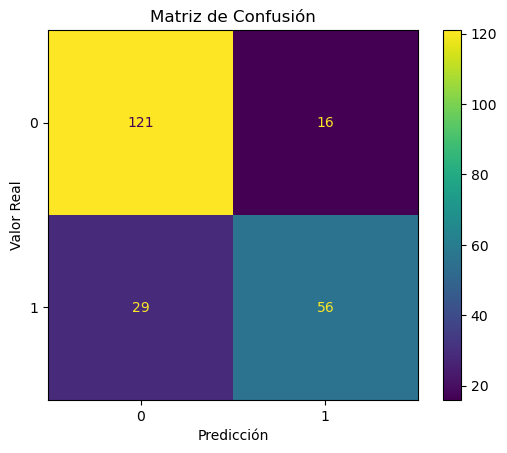

In [30]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

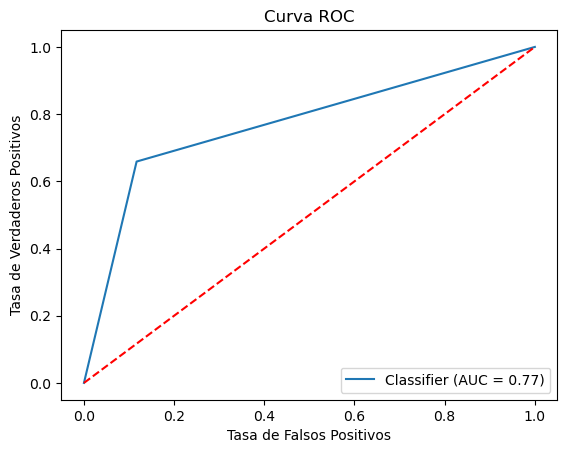

In [31]:
# Curva de precisión del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)

plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Modelo aleatorio')

plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')

plt.show()